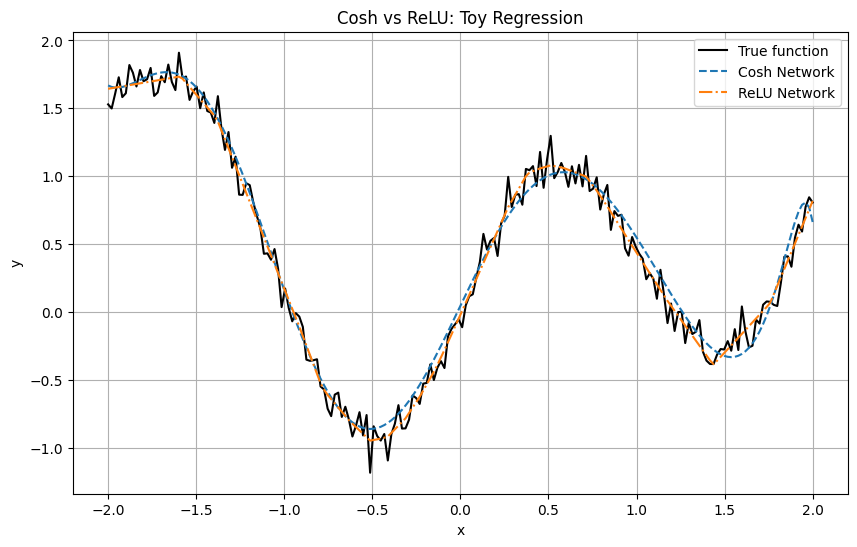

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x_np = np.linspace(-2, 2, 200).reshape(-1, 1)
y_np = np.sin(3 * x_np) + 0.3 * x_np**2 + 0.1 * np.random.randn(*x_np.shape)

x = torch.tensor(x_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)

# Custom cosh activation
class CoshActivation(nn.Module):
    def forward(self, x):
        return torch.cosh(x)

# Simple MLP builder
def make_mlp(activation_fn):
    return nn.Sequential(
        nn.Linear(1, 64),
        activation_fn(),
        nn.Linear(64, 64),
        activation_fn(),
        nn.Linear(64, 1)
    )

# Define models
model_cosh = make_mlp(CoshActivation)
model_relu = make_mlp(nn.ReLU)

# Training loop
def train(model, x, y, epochs=1000, lr=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    for _ in range(epochs):
        optimizer.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()

# Train both models
train(model_cosh, x, y)
train(model_relu, x, y)

# Predict
with torch.no_grad():
    y_pred_cosh = model_cosh(x).numpy()
    y_pred_relu = model_relu(x).numpy()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_np, y_np, label='True function', color='black')
plt.plot(x_np, y_pred_cosh, label='Cosh Network', linestyle='--')
plt.plot(x_np, y_pred_relu, label='ReLU Network', linestyle='-.')
plt.title("Cosh vs ReLU: Toy Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


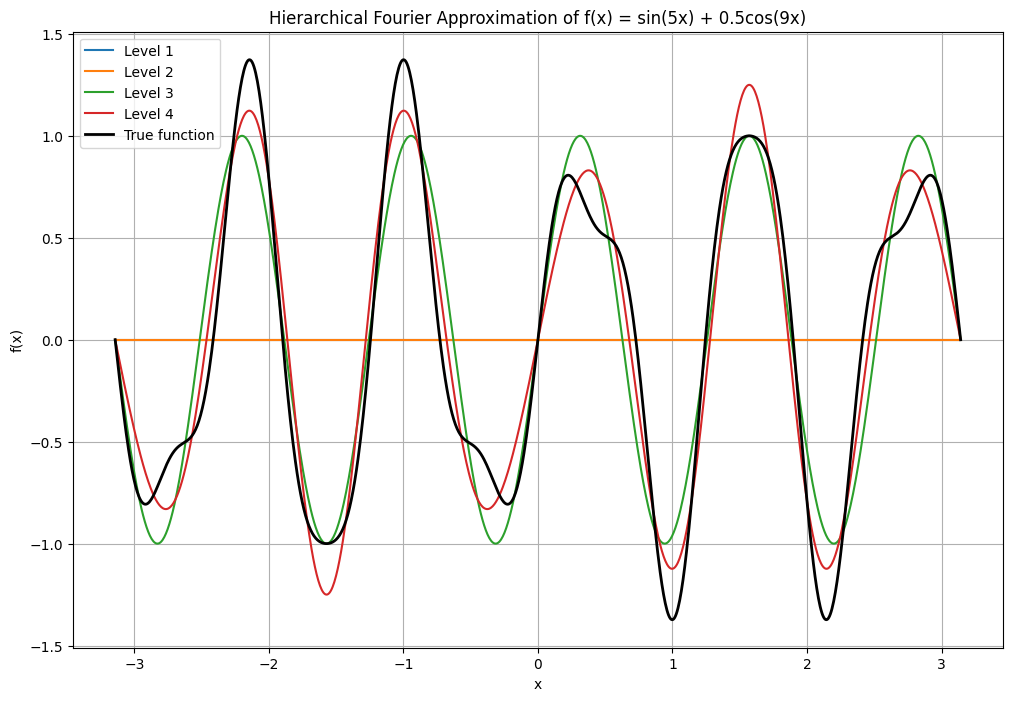

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define target function
def f(x):
    return np.sin(5 * x) + 0.5 * np.cos(9 * x)*np.sin(2*x)

# Inner product for L2 norm over discretized domain
def inner_product(u, v, dx):
    return np.sum(u * v) * dx

# Hierarchical Fourier approximation algorithm
def hierarchical_fourier_approximation(fx, x, levels, freq_schedule):
    dx = x[1] - x[0]
    f_approx = np.zeros_like(fx)
    hierarchy = []

    for level in range(levels):
        residual = fx - f_approx
        f_level = np.zeros_like(fx)
        for k in freq_schedule[level]:
            phi_k = np.cos(k * x)
            psi_k = np.sin(k * x)
            a_k = inner_product(residual, phi_k, dx) / inner_product(phi_k, phi_k, dx)
            b_k = inner_product(residual, psi_k, dx) / inner_product(psi_k, psi_k, dx)
            f_level += a_k * phi_k + b_k * psi_k
        f_approx += f_level
        hierarchy.append(f_approx.copy())
    
    return hierarchy

# Parameters
x = np.linspace(-np.pi, np.pi, 1000)
fx = f(x)
levels = 4
freq_schedule = [
    [1, 2],          # Level 1: low frequencies
    [3, 4],          # Level 2: mid-low
    [5, 6],          # Level 3: mid-high
    [7, 8, 9, 10]    # Level 4: high frequencies
]

# Run the algorithm
hierarchy = hierarchical_fourier_approximation(fx, x, levels, freq_schedule)

# Plot reconstruction at each level
plt.figure(figsize=(12, 8))
for i, approx in enumerate(hierarchy):
    plt.plot(x, approx, label=f'Level {i+1}')
plt.plot(x, fx, 'k-', linewidth=2, label='True function')
plt.title("Hierarchical Fourier Approximation of f(x) = sin(5x) + 0.5cos(9x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
1./6

0.16666666666666666